In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

### Лабораторная работа №10

Данные https://www.kaggle.com/rakeshrau/social-network-ads.

Columns:

`User ID`
<br>
`Gender` - пол
<br>
`Age` - возраст
<br>
`EstimatedSalary` - предполагаемая зарплата пользователя
<br>
`Purchased` - 0 - пользователь не купил продукт, 1 - пользователь купил продукт

In [3]:
df = pd.read_csv('D:/Downloads/Институт/5/3 семестр/Машинное обучение - экз/10/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Удалим ненужные признаки

In [4]:
df = df.drop(columns = ['User ID', 'Gender'])
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values

Разделим данные на обучающую и тестовую выборки (20% - тестовая, 80% - обучающая)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Преобразуем данные в единый "масштаб" при помощи `StandardScaler`:

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Определим, какое минимальное количество деревьев дает качество на кросс-валидации больше 60%:

In [60]:
acc = 0
for k in range(1, 100):
    clf = RandomForestClassifier(n_estimators=k, random_state=1)
    clf.fit(X, y)
    #predictions = clf.predict(X)
    quality = cross_val_score(clf, X_train, y_train, cv=3, scoring='r2')
    #acc = r2_score(y, predictions)
    current_score = quality.mean()
    if round(current_score,2) >= 0.60: 
        print(k, current_score)
        break

7 0.6001432232775517


То есть, при значении `n_estimators` (количество деревьев) = 7, качество модели (`cross_val_score`) чуть больше 0,60

Чтобы найти при каком количестве деревьев качество на кросс-валидации максимально, воспользуемся модулем `GridSearchCV`. В prmts будем хранить параметры, которые хотим подобрать автоматически. В нашем случае это `n_estimators` - количество деревьев, и `max_depth` - глубина дерева. 

In [63]:
prmts = { 'n_estimators': range (1, 100, 1),
        'max_depth': range (1, 20, 2)}

In [66]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
grid = GridSearchCV(clf, prmts, cv=3)
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [67]:
grid.best_params_

{'max_depth': 1, 'n_estimators': 43}

In [68]:
grid.best_score_

0.925

В итоге: 

максимальное качество (0.925) достигается при значении параметров `n_estimators` = 43 и `max_depth` = 1

In [69]:
y_pred = grid.predict(X_test)

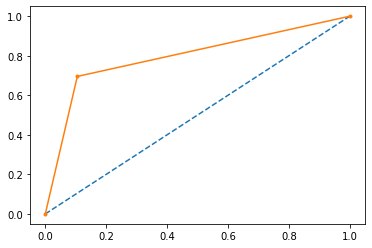

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

for i in (1, 0.5, 0.3, 0.2, 0.1):
    clf = GradientBoostingClassifier(n_estimators=20, verbose=True, learning_rate = i, random_state=1)
    clf.fit(X_train, y_train)
    print("Learning rate: ", i)
    print("Accuracy score (training): {0:.3f}".format(clf.score(X_train, y_train)))

      Iter       Train Loss   Remaining Time 
         1           0.5015            0.97s
         2           0.3751            0.49s
         3           0.3055            0.32s
         4           0.2788            0.24s
         5           0.2196            0.18s
         6           0.2098            0.15s
         7           0.1804            0.12s
         8           0.1576            0.10s
         9           0.1468            0.09s
        10           0.1263            0.07s
        20           0.0515            0.00s
Learning rate:  1
Accuracy score (training): 0.994
      Iter       Train Loss   Remaining Time 
         1           0.7410            0.06s
         2           0.5489            0.05s
         3           0.4421            0.05s
         4           0.3786            0.04s
         5           0.3435            0.04s
         6           0.3055            0.04s
         7           0.2836            0.03s
         8           0.2588            0.03s
  

In [11]:
y_pred_gbc = clf.predict(X_test)

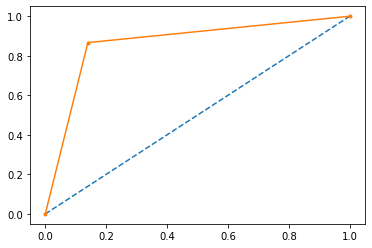

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbc)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()